# Compound interest                                                
Accumulated value                                                  
$$ P(t) = P_0 (1 + \frac{r}{n})^{nt} $$                            
Interest                                                           
$$ I(t) = P(t) - P_0 $$                                            
                                                                   

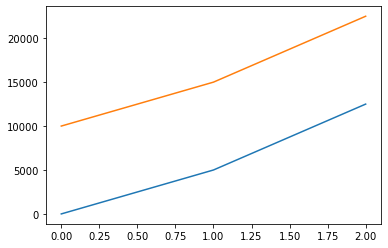

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def makeP(P0, r, n):
    def P(t):
        return P0 * (1+r/n)**(n*t)
    return P

def makeI(P0, r, n):
    def I(t):
        P = makeP(P0, r, n)
        return P(t) - P0
    return I

n_periods = 2
t = np.linspace(0,n_periods,n_periods+1)
P0 = 10000.
r = 0.5
r_t = 0.3
P = makeP(P0, r, 1)
I = makeI(P0, r, 1)
plt.plot(t, I(t))
plt.plot(t, P(t))
plt.show()

# Funds and tax                                                    
Accumulated value for n=1 and t=i with tax rate $r_t$ (after i)    
$$ P(i) = P_0 (1 + r)^i $$                                         
Interest                                                           
$$ I(i) = P(i) - P_0 = P_0 ((1 + r)^i-1) $$                                            
Tax                                                                
$$ T(i) = r_t I(i)= P_0 r_t((1 + r)^i-1)$$                                               
Accumulated value after tax                                        
$$ P_{net}(i) = P(i) - T(i) = P(i) - r_t P(i) + r_t P_0 $$
$$ P_{net}(i) = P(i)(1-r_t) + r_t P_0 $$
$$ P_{net}(i) = P_0((1 + r)^i(1-r_t) + r_t) $$

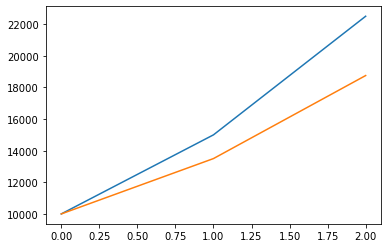

In [81]:
def makeT(r_t, I):
    def T(t):
        return r_t*I(t)
    return T

def makePnet(P0, r, r_t):
    def Pnet(t):
        return P0*((1+r)**t*(1-r_t)+r_t)
    return Pnet

T = makeT(r_t, I)
Pnet = makePnet(P0, r, r_t)

# plt.plot(t, T(t))
# plt.plot(t, Pnet(t))
plt.plot(t, P(t))
plt.plot(t, Pnet(t))
plt.show()

Accumulated value taxed yeach period
$$ P_{tpp}(i) = P_0(1 + r(1-r_t))^i$$

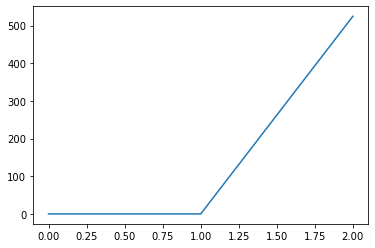

In [82]:
def makePtpp(P0, r, r_t):
    def Ptpp(t):
        return P0*(1+r*(1-r_t))**t
    return Ptpp

Ptpp = makePtpp(P0, r, r_t)
# plt.plot(t, 100*(Pnet(t)-Ptpp(t))/P0)
plt.plot(t, Pnet(t)-Ptpp(t))
plt.show()